Exercise 43: Identify the Target Variable and Related KPIs
from the Given Data for the Business Problem

Let's take the example of a subscription problem in the banking sector. 
We will use data that is from direct marketingcampaigns by a banking institution,
where a customer either opens a term deposit or not after the campaign. The
subscription problem is characterized or defined contrastingly by every organization.
For the most part, the customers whowill subscribe to a service (here, it is a term
deposit) have higher conversion potential (that is, from lead to customerconversion)
to a service or product. Thus, in this problem, subscription metrics, that is, 
the outcome of historical data, isconsidered as the target variable or KPI.

We will use descriptive analytics to explore trends in the data. We will start
by identifying and defining the target variable (here, subscribed or not
subscribed) and the related KPIs. # This information is contained 
in attribute: y - has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
# 2. Import libraries


import numpy as np
import pandas as pd
import seaborn as sns
import time
import re
import os
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [5]:
# 3. Read and explore the dataset.

df = pd.read_csv('bank.csv', sep=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
print(df.shape)


(4521, 17)


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


When studying the target variable (subscribed or not subscribed—y), it is
important to look at the distribution of it. The type of target variable
in this dataset is categorical, or of multiple classes. In this case, 
it's binary (Yes/No).When the distribution is skewed to one class, 
the problem is known as an imbalance in the variable. We can study the
proportion of the target variable using a bar plot. This gives us an 
idea about how many of each class there is (in this case, how many 
each of no and yes). The proportion of no is way higher than yes, which 
explains the imbalance in the data.

/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

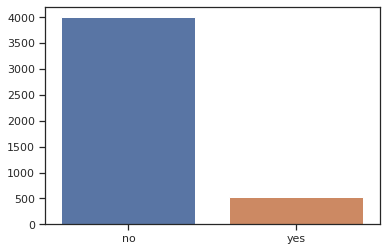

In [7]:
# 4. Let's execute the following commands to plot a bar plot for the given data:

count_number_susbc = df["y"].value_counts()
sns.barplot(count_number_susbc.index, count_number_susbc.values)

In [9]:
df["y"].value_counts()

no     4000
yes     521
Name: y, dtype: int64

Histograms/density plots are a great way to explore numerical/float variables,
similar to bar plots. They can be used for categorical data variables. 
Now, we will take each variable and look at their distribution trends.

(array([  7.,  16.,  44., 121., 197., 247., 423., 417., 180., 349., 289.,
        277., 256., 217., 227., 226., 192.,  86., 165., 164., 176., 118.,
         23.,  15.,  15.,   7.,   6.,  13.,  10.,   9.,   8.,   7.,   7.,
          4.,   1.,   2.]),
 array([19.        , 20.88888889, 22.77777778, 24.66666667, 26.55555556,
        28.44444444, 30.33333333, 32.22222222, 34.11111111, 36.        ,
        37.88888889, 39.77777778, 41.66666667, 43.55555556, 45.44444444,
        47.33333333, 49.22222222, 51.11111111, 53.        , 54.88888889,
        56.77777778, 58.66666667, 60.55555556, 62.44444444, 64.33333333,
        66.22222222, 68.11111111, 70.        , 71.88888889, 73.77777778,
        75.66666667, 77.55555556, 79.44444444, 81.33333333, 83.22222222,
        85.11111111, 87.        ]),
 <BarContainer object of 36 artists>)

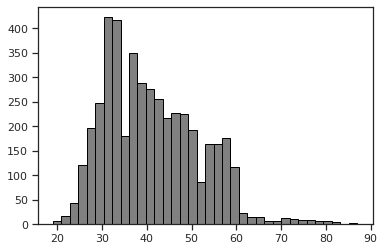

In [11]:
# 5. Here, we will show two numerical variables, age and balance, as examples
# using a histogram, and two categorical variables, education and month, using bar plots:

# histogram for age (using matplotlib)

plt.hist(df['age'], color = 'grey', edgecolor = 'black',
bins = int(180/5))

/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

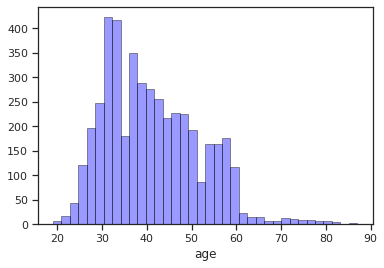

In [12]:
## histogram for age (using seaborn)

sns.distplot(df['age'], hist=True, kde=False,
bins=int(180/5), color = 'blue',
hist_kws={'edgecolor':'black'})

(array([7.000e+00, 2.848e+03, 1.020e+03, 3.340e+02, 1.290e+02, 7.200e+01,
        3.300e+01, 2.300e+01, 1.700e+01, 1.300e+01, 5.000e+00, 3.000e+00,
        6.000e+00, 1.000e+00, 7.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3313.        , -1243.52777778,   825.94444444,  2895.41666667,
         4964.88888889,  7034.36111111,  9103.83333333, 11173.30555556,
        13242.77777778, 15312.25      , 17381.72222222, 19451.19444444,
        21520.66666667, 23590.13888889, 25659.61111111, 27729.08333333,
        29798.55555556, 31868.02777778, 33937.5       , 36006.97222222,
        38076.44444444, 40145.91666667, 42215.38888889, 44284.86111111,
        46354.33333333, 48423.80555556, 50493.27777778, 52562.75      ,
        54632.22222222, 56701.69444444, 58771.1666

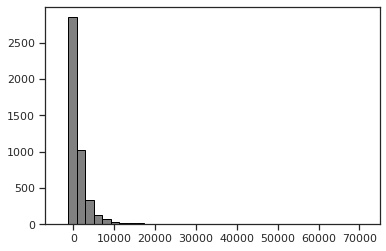

In [13]:
# histogram for balance (using matplotlib)

plt.hist(df['balance'], color = 'grey', edgecolor = 'black',
bins = int(180/5))

<AxesSubplot:xlabel='balance'>

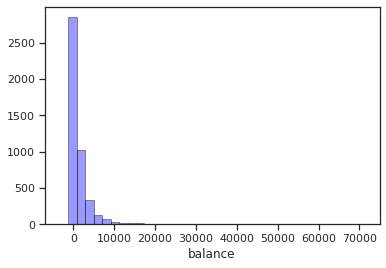

In [15]:
# histogram for balance (using seaborn)

sns.distplot(df['balance'], hist=True, kde=False,
bins=int(180/5), color = 'blue',
hist_kws={'edgecolor':'black'})

/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

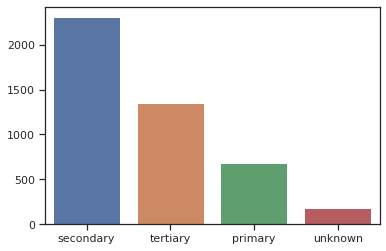

In [16]:
# 7. Now, using the following code, plot a bar plot for the education
# attribute in the dataset:

# barplot for the variable 'education'

count_number_susbc = df["education"].value_counts()
sns.barplot(count_number_susbc.index, count_number_susbc.values)

In [17]:
df["education"].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

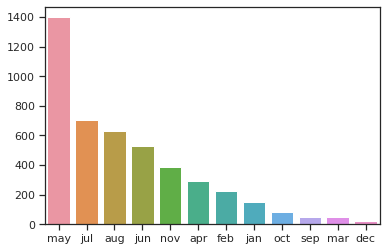

In [18]:
# 8. Use the following command to plot a bar plot for the month attribute of the dataset:

# barplot for the variable 'month'
count_number_susbc = df["month"].value_counts()
sns.barplot(count_number_susbc.index, count_number_susbc.values)

In [19]:
df["month"].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [20]:
# 9. The next task is to generate a distribution for each class of the target
# variable to compare the distributions. Plot a
# histogram of the age attribute for the target variable (yes/no).

# generate separate list for each subscription type for age
x1 = list(df[df['y'] == 'yes']['age'])
x2 = list(df[df['y'] == 'no']['age'])

In [21]:
# assign colors for each subscription type
colors = ['#E69F00', '#56B4E9']
names = ['yes', 'no']

In [ ]:
# We will use density parameter.
# If dedsity=True, the first element of the return tuple will be 
# the counts normalized to form a probability density, i.e., the
# area (or integral) under the histogram will sum to 1. This is 
# achieved by dividing the count (in the bin) by the number of
# observations (total) times the bin width and not dividing by 
# the total number of observations. E.g.: count / (number of
# observations * bin width)

# plot the histogram
plt.hist([x1, x2], bins = int(180/15), density=True,
color = colors, label=names)
# plot formatting
plt.legend()
plt.xlabel('IV')
plt.ylabel('prob distr (IV) for yes and no')
plt.title('Histogram for Yes and No Events w.r.t. IV')

<AxesSubplot:xlabel='month'>

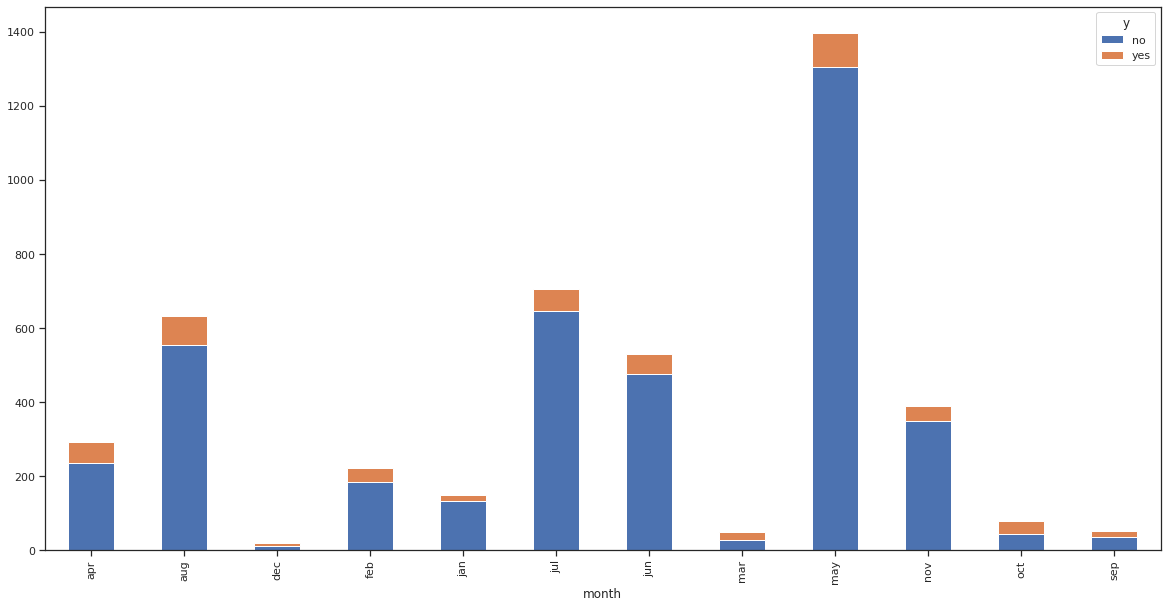

In [24]:
# The above is the bar plot of the month attribute target variable.


# 10. Now, using the following command, plot a bar plot for the 
# target variable grouped by month:

#df.groupby(["month", "y"]).size().unstack()
df.groupby(["month", "y"]).size().unstack().plot(kind='bar', stacked=True,figsize=(20,10))

In this exercise, we looked into establishing KPIs and the target variable—data 
gathering and analysis-data (data that is generated by merging or combining 
multiple data sources to get one dataset for analysis) generation. The KPIs and target
variable have been determined—KPI visualization. Now, in the next exercise, we will
identify which of the variables are important in terms of explaining the variance 
of the target variable— feature importance.

Exercise 44: Generate the Feature Importance of the Target

Variable and Carry Out EDA (Exploratory Data Analysis)
In the previous exercise, we looked into the trends of the attributes, 
identifying their distribution, and how we can use various plots and 
visualization methods to carry these out. Prior to tackling a modeling 
problem, whether it is a predictive or a classification problem 
(for example, from the previous marketing campaign data, how to predict
 future customers that will have the highest probability of converting),
we have to pre-process the data and select the important features that will
impact the subscription campaign output models. To do this, we have to see
the association of the attributes to the outcome (the target variable),
that is, how much variability of the target variable is explained by each
variable. Associations between variables can be drawn using multiple methods;
however, we have to consider the data type when choosing a method/algorithm.
For example, if we are studying numerical variables (integers that are ordered,
floats, and so on), we can use correlation analysis; if we are studying categorical
variables with multiple classes, we can use Chi-Square methods.
However, there are many algorithms that can handle both together 
and provide measurable outcomes to compare the importance of variables. 
In this exercise, we will look at how various methods can be used to
identify the importance of features.

In [38]:
# 1. Use the same dataset as in previous excercise: bank.csv

# 2. Develop a correlation matrix using the following command to identify the correlation
# between the variables:
# Convert categorial attributes into binary values to find also their correlations with 
# other attributes.

In [25]:
#inplace=True means - 'change and apply in dataset'
df['y'].replace(['yes','no'],[1,0],inplace=True)
df['default'].replace(['yes','no'],[1,0],inplace=True)
df['housing'].replace(['yes','no'],[1,0],inplace=True)
df['loan'].replace(['yes','no'],[1,0],inplace=True)

In [26]:
df.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
age,1.000000,-0.017885,0.083820,-0.193888,-0.011250,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
default,-0.017885,1.000000,-0.070886,0.006881,0.063994,-0.013261,-0.011615,-0.012348,-0.026317,-0.026656,0.001303
balance,0.083820,-0.070886,1.000000,-0.050227,-0.071349,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
housing,-0.193888,0.006881,-0.050227,1.000000,0.018451,-0.031291,0.015740,-0.003574,0.116893,0.038621,-0.104683
loan,-0.011250,0.063994,-0.071349,0.018451,1.000000,-0.004879,-0.004997,0.017120,-0.031086,-0.022115,-0.070517
day,-0.017853,-0.013261,-0.008677,-0.031291,-0.004879,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
duration,-0.002367,-0.011615,-0.015950,0.015740,-0.004997,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.012348,-0.009976,-0.003574,0.017120,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,-0.026317,0.009437,0.116893,-0.031086,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,-0.026656,0.026196,0.038621,-0.022115,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714


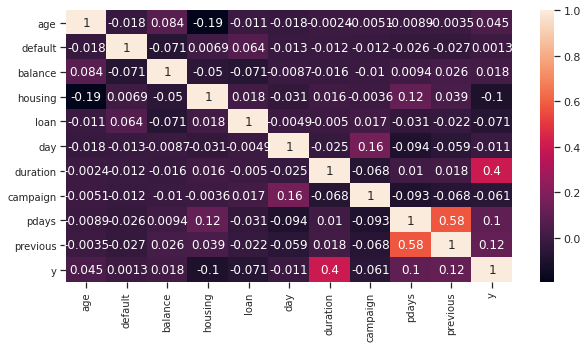

In [28]:
#try heatmap attr: cmap = "Blues"
corr_df = df.corr()
sns.heatmap(corr_df, xticklabels=corr_df.columns.values, yticklabels=corr_df.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf() #get current figure, if no current, new created using figure()
heat_map.set_size_inches(10,5)
plt.xticks(fontsize=10); plt.yticks(fontsize=10)
plt.show()

Correlation analysis is carried out to analyze the relationships between numerical variables. Here, we converted the
categorical target variable into binary values and looked into how it correlates with other variables.
The correlation coefficient values in the matrix can range from -1 to +1 , where a value close to 0 signifies no relation, -1
signifies a relation where one variable reduces as the other increases (inverse), and +1 signifies that as one variable
increases the other also increases (direct).
High correlation among independent variables (which are all variables except the target variable) can lead to
multicollinearity among the variables, which can affect the predictive model accuracy.

Note
Make sure to install boruta if not installed already using the following command:
pip install boruta --upgrade

In [33]:
%pip install boruta --upgrade

     |████████████████████████████████| 56 kB 233 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


3. Build a feature importance output based on Boruta (a wrapper algorithm around a random forest):

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
from boruta import BorutaPy

In [6]:
# transform all categorical data types to integers (hot-encoding)forcol_nameindf.columns:
for col_name in df.columns:
    if(df[col_name].dtype=='object'):
        df[col_name]=df[col_name].astype('category')
        df[col_name]=df[col_name].cat.codes

In [7]:
# generate separate dataframes for IVs and DV (target variable)

X=df.drop(['y'],axis=1).values

In [8]:
Y=df['y'].values

In [9]:
# build RandomForestClassifier, Boruta models and related parameter

rfc=RandomForestClassifier(n_estimators=200,n_jobs=4,class_weight='balanced',max_depth=6)

In [10]:
boruta_selector=BorutaPy(rfc,n_estimators='auto',verbose=2)

In [44]:
#boruta_selector = BorutaPy(rfc, n_estimators='auto', max_iter='20')

In [11]:
n_train=len(X)

In [12]:
# fit Boruta algorithm

boruta_selector.fit(X,Y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	7
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=6,
                                          n_estimators=70, n_jobs=4,
                                          random_state=RandomState(MT19937) at 0x7F7CBDF1E340),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F7CBDF1E340, verbose=2)

,features,rank,support,support_weak
0,age,1,True,False
1,balance,1,True,False
2,contact,1,True,False
3,month,1,True,False
4,duration,1,True,False
5,pdays,1,True,False
6,previous,1,True,False
7,poutcome,1,True,False
8,housing,2,False,False
9,day,3,False,False


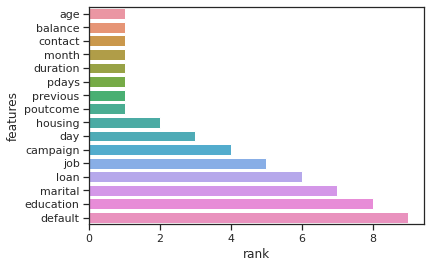

In [13]:
feature_df=pd.DataFrame(df.drop(['y'],axis=1).columns.tolist(),columns=['features'])
feature_df['rank']=boruta_selector.ranking_
feature_df['support']=boruta_selector.support_#suggestion to keep/drop (True/False)
feature_df['support_weak']=boruta_selector.support_weak_#feature_df['feature_importance']=rfc.feature_importances_
feature_df=feature_df.sort_values('rank',ascending=True).reset_index(drop=True)
sns.barplot(x='rank',y='features',data=feature_df)
feature_df

As you can see, the features stored in boruta.support_ are the ones that at some point ended up in the acceptance area,
thus you should include them in your model. The features stored in boruta.support_weak_ are the ones that Boruta didn’t
manage to accept or refuse and the choice is up to the data scientist: these features may be accepted or not depending
on the use case.
More about Boruta explained:
https://towardsdatascience.com/boruta-explained-the-way-i-wish-someone-explained-it-to-me-4489d70e154a
(https://towardsdatascience.com/boruta-explained-the-way-i-wish-someone-explained-it-to-me-4489d70e154a)